## Main2 Analysis
The smileys (students' short questionnaire) is considered in this analysis.
For basic statistics, refer to previous notebook (main.ipynb).

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import pingouin as pg
import string
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
# Input parameters
export_feedback_table = False
inputfile_sssummary  = 'output/studentsummary_20240304.csv'
inputfile_assignment = 'rawdata/assignment_20240222.csv'
inputfile_feedback   = 'rawdata/feedback_20240222.csv'
#outputfile_feedback  = 'output/feedback_pretest_20240222.xlsx'

In [10]:
# Import raw data and converting 'created' to datetime
df_sssummary  = pd.read_csv(inputfile_sssummary, index_col=0)
df_assignment = pd.read_csv(inputfile_assignment, index_col=0)
df_feedback   = pd.read_csv(inputfile_feedback, index_col=0)
df_sssummary['1st_created'] = pd.to_datetime(df_sssummary['1st_created'])
df_assignment['created']    = pd.to_datetime(df_assignment['created'])
df_feedback['created']      = pd.to_datetime(df_feedback['created'])

In [11]:
# Preview summary of students
df_sssummary

,anonym,1st_assignment_id,1st_instance_id,1st_created,1st_finished,2nd_assignment_id,2nd_instance_id,2nd_created,2nd_finished,1q1,...,2q5,2q6,2q7,d1,d2,d3,d4,d5,d6,d7
0,AS23S0335,9cc8536e-35ac-4874-807d-9da3d47a4a89,SLF6A,2023-11-02 08:53:20.875,2023-11-02 09:25:30.675000,45209efe-cda7-480f-8984-1a3f780c840d,MYF6A,2023-12-14 07:11:24.502000,2023-12-14 07:34:11.516000,2.0,...,3.0,3.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0
1,AS23S0336,773fac84-9653-4706-94f2-555506fc3c33,MLF6A,2023-11-02 08:58:00.657,2023-11-02 09:22:16.908000,d2fa8b28-d4d6-4c19-82aa-da16bd7a5788,SYF6A,2023-12-14 07:05:41.840000,2023-12-14 07:35:03.174000,3.0,...,2.0,3.0,3.0,0.0,-1.0,1.0,2.0,0.0,2.0,1.0
2,AS23S0338,7bc2eab6-f284-42ae-b22b-5edfb37dbe8b,SPF6A,2023-11-02 08:54:09.316,2023-11-02 09:38:22.077000,af7ce587-f8ad-4459-93b0-57fd57d9f51a,MTF6A,2023-12-14 07:08:11.195000,2023-12-14 07:51:40.348000,1.0,...,2.0,3.0,3.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0
3,AS23S0339,7448ecde-72d7-4a88-817f-ed4a726879b9,MPF6A,2023-11-02 08:58:04.547,2023-11-02 09:22:15.866000,10119783-d851-4169-a3cd-cd90e31b3c4d,SYF6A,2023-12-14 07:11:25.845000,2023-12-14 07:50:46.121000,2.0,...,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,AS23S0340,d47c0ae8-7835-460b-95fa-c7628e5b2a6f,SLF6A,2023-11-02 08:54:17.666,2023-11-02 09:38:28.370000,4ba95ff5-dce4-4fb3-9ede-5f8b1e85aaa3,MTF6A,2023-12-14 07:10:13.541000,2023-12-14 07:48:41.943000,1.0,...,2.0,2.0,2.0,1.0,-1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,KS23S0524,5b8ca84d-6077-4bfe-9ac8-9eccef94fa94,MLU5B,2023-11-03 08:21:16.763,2023-11-03 08:57:18.923000,05de3586-6c8e-48de-a29c-eab564dd1570,SYU5B,2023-12-08 08:07:26.787000,2023-12-08 08:36:17.536000,2.0,...,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0
131,KS23S0525,868df9b2-60f0-4d4d-8900-3c521c089b23,SPU5B,2023-11-03 08:21:24.899,2023-11-03 09:00:11.750000,b0ac2e0e-0c94-4676-a24f-82b2d9b7f97c,MYU5B,2023-12-08 08:07:55.437000,2023-12-08 08:49:12.060000,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
132,KS23S0526,7f39c8b5-5527-45fb-babe-c08f539b94fa,MLU5B,2023-11-03 08:20:54.674,2023-11-03 08:48:00.626000,036546ed-faa3-4ade-ba37-2c74e6a0dfff,STU5B,2023-12-08 08:09:44.542000,2023-12-08 08:25:38.384000,1.0,...,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
133,KS23S0527,b7ac135e-5f9e-450a-9c20-7dedbbbd53a6,MLU5B,2023-11-03 08:20:51.395,2023-11-03 08:57:40.682000,1e513fb9-e7df-41b1-8cc0-74b0cdca12e1,STU5B,2023-12-08 08:07:33.879000,2023-12-08 08:31:08.787000,2.0,...,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0


### Feedback Data Preprocessing

In [12]:
# Add the 'time_elapsed' column to df_feedback

def calculate_time_difference(row, df_a):
    sid = row['assignment_id'] 
    action_time = row['created']
    # Check if student_id exists in df_a
    if sid in df_a.index:
        starting_time = df_a.at[sid, 'created']
        return (action_time - starting_time).total_seconds()
    else:
        return None  # or some other default value

df_feedback['time_elapsed'] = df_feedback.apply(lambda row: calculate_time_difference(row, df_assignment), axis=1)

In [13]:
# Remove abnormality on time elapsed, which should be less than 1 hour
df_feedback = df_feedback[df_feedback['time_elapsed'] <= 3600]

In [14]:
# Sort the DataFrame by 'assignment_id' and 'created' to ensure the order
df_feedback = df_feedback.sort_values(by=['assignment_id', 'created'])

# Add a new column 'sequence' which enumerates each student's rows starting from 1
df_feedback['count'] = df_feedback.groupby('assignment_id').cumcount() + 1

In [15]:
df_feedback.sort_values('time_elapsed')

,assignment_id,phase,type_id,feedback_text,details,created,time_elapsed,count
action_id,,,,,,,,
d046c672-3a8d-426b-84e6-153ac6a5667b,036546ed-faa3-4ade-ba37-2c74e6a0dfff,search,NaN,Hienoa! Löysit 2 tehtävään sopivaa sivua Tarvi...,"{""0"":{""assignment_id"":""036546ed-faa3-4ade-ba37...",2023-12-08 08:10:33.023,48.481,1
ef110b2e-3dc5-42a7-bbd3-d85cc7ab9de0,036546ed-faa3-4ade-ba37-2c74e6a0dfff,search,NaN,Hienoa! Löysit 2 tehtävään sopivaa sivua Tarvi...,"{""0"":{""assignment_id"":""036546ed-faa3-4ade-ba37...",2023-12-08 08:10:33.646,49.104,2
db357d25-dbbf-4ef6-affd-04dff633cb51,7448ecde-72d7-4a88-817f-ed4a726879b9,search,NaN,Viimeisin hakusi löysi 0 sopivaa sivua. Sinul...,"{""0"":{""assignment_id"":""7448ecde-72d7-4a88-817f...",2023-11-02 08:59:00.020,55.473,1
94411d8d-177a-4d74-b128-8fdcc802aa69,d0637fb0-4963-48c7-91f8-fa4b83d6e1e3,search,NaN,Haun tarkoitus on löytää tehtävän kannalta hyö...,"{""0"":{""assignment_id"":""d0637fb0-4963-48c7-91f8...",2023-11-03 07:21:51.080,57.130,1
0a42b824-8012-4f39-9d42-0cf962c92246,81c6d13c-095e-4dde-8689-c68a99df7f07,search,NaN,Haun tarkoitus on löytää tehtävän kannalta hyö...,"{""0"":{""assignment_id"":""81c6d13c-095e-4dde-8689...",2023-12-12 07:16:21.388,59.772,1
...,...,...,...,...,...,...,...,...
24d90552-f953-4b42-921e-4b62247b3222,e63a80de-941f-4b14-91a4-657ec8ada29b,snippet_micro,NaN,Hyvä yritys! Olet valinnut 1 pääkohdan tästä t...,"{""text_id"": 337, ""feedback_code"": 1, ""details""...",2023-11-06 08:03:48.789,2220.384,3
950bfc94-a485-4afc-b336-10f3a9c8e9ce,7c1355f0-2161-44db-b79c-5049524fc16f,snippet_micro,NaN,Hienosti yritetty! Olet valinnut 2 pääkohtaa t...,"{""text_id"": 349, ""feedback_code"": 1, ""details""...",2023-11-02 09:33:49.658,2248.365,4
25fd4a54-f0dd-4e8a-b68b-a328e76ee378,80647cda-ff00-4e36-9944-6d5ccd7aebc5,search,NaN,Hyvä! Olet vieraillut 2 tehtävään sopivalla si...,"{""0"":{""assignment_id"":""80647cda-ff00-4e36-9944...",2023-12-14 09:45:40.853,2298.297,7


## Analysis with Target Group(s)

In [48]:
# Define the target groups and tests and get the assignment_id for analysis
list_group = ['Intervention','Control','Both']
list_test = ['Pre','Post','Both']
list_task = ['Metsa','Suo','Both']
list_form = ['Long','Short','Both']

def get_target_df(df, group='Both', filter_bothtest=True, test='Both'):
    # Choose group
    if group == 'Intervention':
        df_filtered = df[df['anonym'].str.startswith("A")]
    elif group == 'Control':
        df_filtered = df[df['anonym'].str.startswith("K")]
    else:  # Both groups
        df_filtered = df

    # Filter rows based on NA values in assignments (participated in both tests)
    if filter_bothtest:
        df_filtered = df_filtered.dropna(subset=['1st_assignment_id', '2nd_assignment_id'])
    else:
        df_filtered = df_filtered[df_filtered[['1st_assignment_id', '2nd_assignment_id']].isna().any(axis=1)]

    # Choose assignments
    if test == 'Pre':
        target_assid = df_filtered['1st_assignment_id'].tolist()
    elif test == 'Post':
        target_assid = df_filtered['2nd_assignment_id'].tolist()
    else:  # Both tests
        target_assid = df_filtered['1st_assignment_id'].tolist() + df_filtered['2nd_assignment_id'].tolist()

    return df_filtered, target_assid

# Example
df_target, target_assid = get_target_df(df_sssummary, group='Control', filter_bothtest=True, test='Pre')
print('Number of assignment IDs in the target group =', len(target_assid))

Number of assignment IDs in the target group = 46


In [49]:
# Filtered the feedback df with the target assignment_id
df_feedback_filtered = df_feedback[df_feedback['assignment_id'].isin(target_assid)]
#df_feedback_filtered

In [50]:
# Check the number of each type of feedback
df_feedback_filtered.groupby('phase').describe()

type_id                              time_elapsed               \
                count mean std min 25% 50% 75% max        count         mean   
phase                                                                          
search            0.0  NaN NaN NaN NaN NaN NaN NaN         64.0   852.022687   
snippet_micro     0.0  NaN NaN NaN NaN NaN NaN NaN         61.0  1054.822525   

               ...                       count                                \
               ...         75%       max count      mean       std  min  25%   
phase          ...                                                             
search         ...  1110.53775  1906.985  64.0  4.187500  3.724117  1.0  1.0   
snippet_micro  ...  1286.56900  2220.384  61.0  2.721311  1.836039  1.0  1.0   

                               
               50%  75%   max  
phase                          
search         2.5  6.0  15.0  
snippet_micro  2.0  3.0   8.0  

[2 rows x 24 columns]

In [51]:
# Group by 'count' and calculate the mean of 'time_elapsed' for each group
average_time_elapsed_per_count = df_feedback_filtered.groupby('count')['time_elapsed'].describe()

# Display the average time elapsed for counts from 1 to 15
average_time_elapsed_per_count.loc[1:15]

,count,mean,std,min,25%,50%,75%,max
count,,,,,,,,
1,38.0,638.455842,437.803062,63.805,299.78650,523.9365,959.29875,1851.625
2,26.0,983.384192,496.175433,157.485,633.71575,1016.6165,1199.56350,2174.635
3,19.0,1069.435000,499.114992,219.035,775.07750,1137.6650,1252.48000,2220.384
4,12.0,1132.348333,523.575474,306.003,714.63450,1165.0640,1386.86025,2096.010
5,7.0,1065.361857,464.283560,569.010,723.26800,782.6080,1517.19900,1624.981
6,5.0,1157.266600,405.470111,887.201,916.93500,974.8330,1147.56400,1859.800
7,4.0,1272.022500,476.995636,906.575,1010.94125,1105.9580,1367.03925,1969.599
8,4.0,1384.265000,465.873178,912.862,1111.33525,1310.7010,1583.63075,2002.796
9,2.0,1221.083500,427.240281,918.979,1070.03125,1221.0835,1372.13575,1523.188


In [55]:
# These are the cummunative data hand-copied from the above
# Data conversion is done by:
#  (1) Finding the count for each number of feedback request;
#  (2) The corresponding percentage.
# After conversion, data are copied to the next two cells.

data = [
    [1,1,1,1,2,2,2,4,4,5,7,12,19,26,38,46],   # 'Pre-test Control'
    [0,0,0,0,0,0,0,1,1,3,5,12,16,26,33,46],   # 'Post-test Control'
    [2,3,3,3,3,3,3,6,8,9,13,23,36,46,59,89],  # 'Pre-test Intervention'
    [2,2,3,4,4,4,4,6,10,10,13,17,27,35,51,89] # 'Post-test Intervention'
]

# (1) Count
for d in data:
    output = [j - i for i, j in zip(d[:-1], d[1:])]
    output.insert(0, d[0])
    print(output)

# (2) Percentage
for d in data:
    output = [round((j - i)/d[len(d)-1]*100) for i, j in zip(d[:-1], d[1:])]
    output.insert(0, round(d[0]/d[len(d)-1]*100))
    print(output)

[1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 5, 7, 7, 12, 8]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 7, 4, 10, 7, 13]
[2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 4, 10, 13, 10, 13, 30]
[2, 0, 1, 1, 0, 0, 0, 2, 4, 0, 3, 4, 10, 8, 16, 38]
[2, 0, 0, 0, 2, 0, 0, 4, 0, 2, 4, 11, 15, 15, 26, 17]
[0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 15, 9, 22, 15, 28]
[2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 4, 11, 15, 11, 15, 34]
[2, 0, 1, 1, 0, 0, 0, 2, 4, 0, 3, 4, 11, 9, 18, 43]


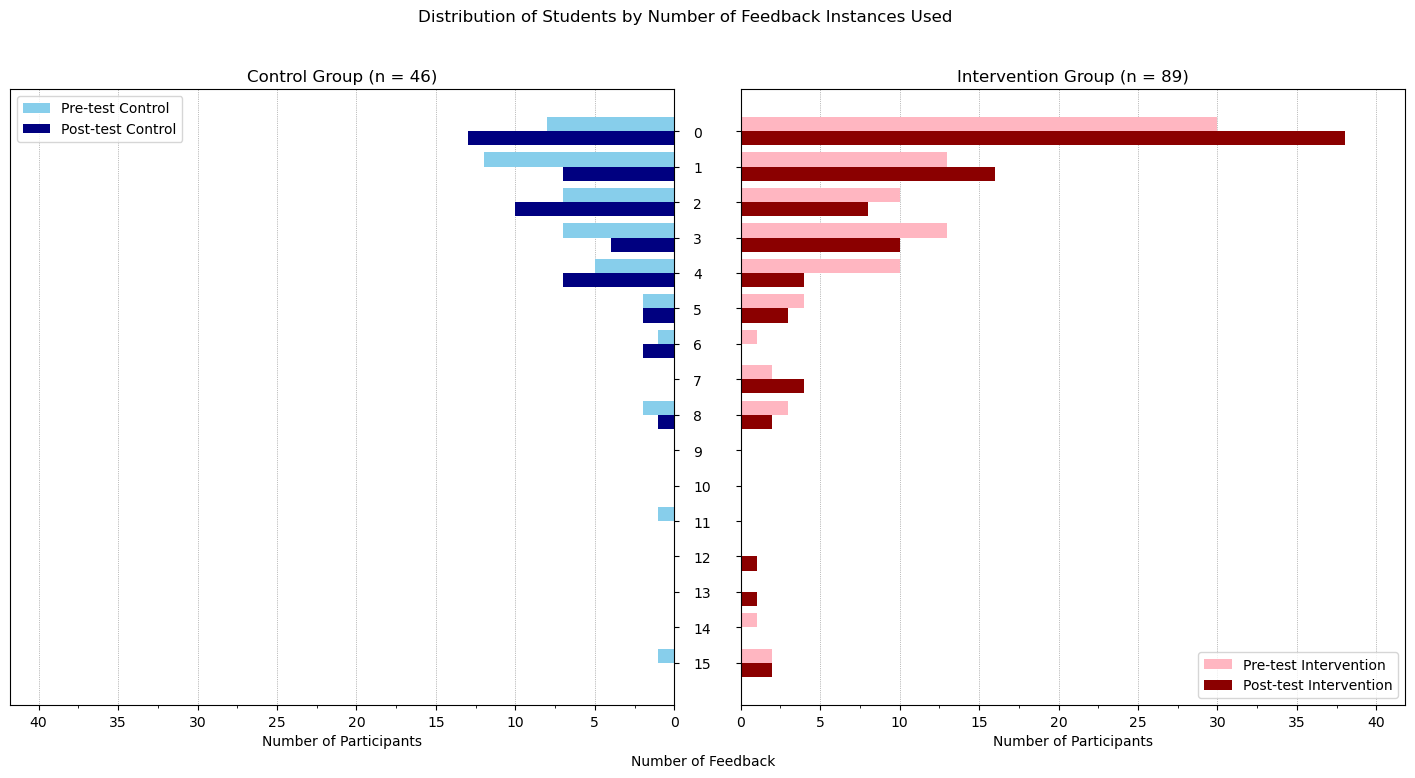

In [56]:
# Count Chart
data = {
    'Feedback Used': ['15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0'],
    'Pre-test Control': [1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 5, 7, 7, 12, 8],
    'Post-test Control': [0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 7, 4, 10, 7, 13],
    'Pre-test Intervention': [2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 4, 10, 13, 10, 13, 30],
    'Post-test Intervention': [2, 0, 1, 1, 0, 0, 0, 2, 4, 0, 3, 4, 10, 8, 16, 38]
}
df = pd.DataFrame(data)

# Create the subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Set up minor ticks on the x-axis using a locator
locator = ticker.AutoMinorLocator(2)  # This will add one minor tick between the major ticks
ax1.xaxis.set_minor_locator(locator)
ax2.xaxis.set_minor_locator(locator)

# Enable vertical grid lines for minor ticks on both subplots
# Customize the grid's appearance as desired
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(which='major', axis='x', linestyle=':', linewidth='0.5', color='gray')
ax2.grid(which='major', axis='x', linestyle=':', linewidth='0.5', color='gray')


# Set the positions of the bars on the x-axis
indices = np.arange(len(df['Feedback Used']))
width = 0.4  # the width of the bars has been adjusted to accommodate four bars

# Plot bars for Control group
ax1.barh(indices + width/2, df['Pre-test Control'], width, label='Pre-test Control', color='skyblue')
ax1.barh(indices - width/2, df['Post-test Control'], width, label='Post-test Control', color='navy')

# Plot bars for Intervention group
ax2.barh(indices + width/2, df['Pre-test Intervention'], width, label='Pre-test Intervention', color='lightpink')
ax2.barh(indices - width/2, df['Post-test Intervention'], width, label='Post-test Intervention', color='darkred')

# Invert the x-axis of the Control subplot for a mirrored effect
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.tick_params(axis='y', which='major', pad=10)

# Set titles
ax1.set(title='Control Group (n = 46)')
ax2.set(title='Intervention Group (n = 89)')

# Calculate the maximum value across all datasets and add some padding for visual aesthetics
max_value = max(df['Pre-test Control'].max(), df['Post-test Control'].max(), 
                df['Pre-test Intervention'].max(), df['Post-test Intervention'].max())
padding = max_value * 0.1
max_limit = max_value + padding

# Set the same x-axis limits for both subplots, with padding
ax1.set_xlim(max_limit, 0)  # Inverted axis for ax1
ax2.set_xlim(0, max_limit)

# Set y-ticks to be in the middle of the grouped bars
ax2.set_yticks(indices)
ax2.set_yticklabels(df['Feedback Used'])

# Set y-axis label as text
fig.text(0.51, 0.04, 'Number of Feedback', ha='center', va='center')


# Set x-axis labels
ax1.set_xlabel('Number of Participants')
ax2.set_xlabel('Number of Participants')

# Add legends
ax1.legend()
ax2.legend()

# Adjust layout
plt.subplots_adjust(wspace=0.1)  # Adjust the spacing between the two subplots to prevent overlap

# Set the figure title
fig.suptitle('Distribution of Students by Number of Feedback Instances Used')

# Show the plot
plt.show()


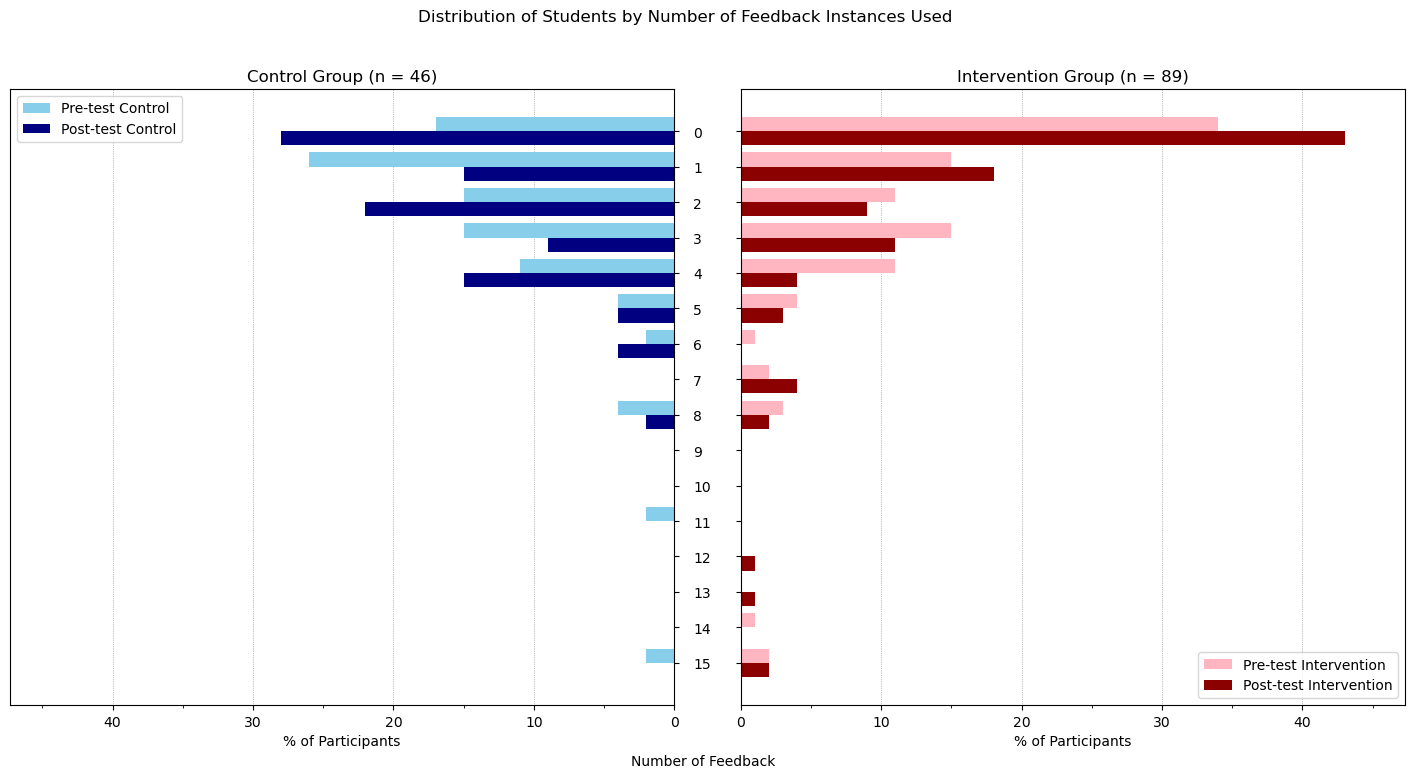

In [57]:
# Percentage Chart
data = {
    'Feedback Used': ['15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0'],
    'Pre-test Control': [2, 0, 0, 0, 2, 0, 0, 4, 0, 2, 4, 11, 15, 15, 26, 17],
    'Post-test Control': [0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 15, 9, 22, 15, 28],
    'Pre-test Intervention': [2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 4, 11, 15, 11, 15, 34],
    'Post-test Intervention': [2, 0, 1, 1, 0, 0, 0, 2, 4, 0, 3, 4, 11, 9, 18, 43]
}

df = pd.DataFrame(data)

# Create the subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Set up minor ticks on the x-axis using a locator
locator = ticker.AutoMinorLocator(2)  # This will add one minor tick between the major ticks
ax1.xaxis.set_minor_locator(locator)
ax2.xaxis.set_minor_locator(locator)

# Enable vertical grid lines for minor ticks on both subplots
# Customize the grid's appearance as desired
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax1.grid(which='major', axis='x', linestyle=':', linewidth='0.5', color='gray')
ax2.grid(which='major', axis='x', linestyle=':', linewidth='0.5', color='gray')


# Set the positions of the bars on the x-axis
indices = np.arange(len(df['Feedback Used']))
width = 0.4  # the width of the bars has been adjusted to accommodate four bars

# Plot bars for Control group
ax1.barh(indices + width/2, df['Pre-test Control'], width, label='Pre-test Control', color='skyblue')
ax1.barh(indices - width/2, df['Post-test Control'], width, label='Post-test Control', color='navy')

# Plot bars for Intervention group
ax2.barh(indices + width/2, df['Pre-test Intervention'], width, label='Pre-test Intervention', color='lightpink')
ax2.barh(indices - width/2, df['Post-test Intervention'], width, label='Post-test Intervention', color='darkred')

# Invert the x-axis of the Control subplot for a mirrored effect
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.tick_params(axis='y', which='major', pad=10)

# Set titles
ax1.set(title='Control Group (n = 46)')
ax2.set(title='Intervention Group (n = 89)')

# Calculate the maximum value across all datasets and add some padding for visual aesthetics
max_value = max(df['Pre-test Control'].max(), df['Post-test Control'].max(), 
                df['Pre-test Intervention'].max(), df['Post-test Intervention'].max())
padding = max_value * 0.1
max_limit = max_value + padding

# Set the same x-axis limits for both subplots, with padding
ax1.set_xlim(max_limit, 0)  # Inverted axis for ax1
ax2.set_xlim(0, max_limit)

# Set y-ticks to be in the middle of the grouped bars
ax2.set_yticks(indices)
ax2.set_yticklabels(df['Feedback Used'])

# Set y-axis label as text
fig.text(0.51, 0.04, 'Number of Feedback', ha='center', va='center')


# Set x-axis labels
ax1.set_xlabel('% of Participants')
ax2.set_xlabel('% of Participants')

# Add legends
ax1.legend()
ax2.legend()

# Adjust layout
plt.subplots_adjust(wspace=0.1)  # Adjust the spacing between the two subplots to prevent overlap

# Set the figure title
fig.suptitle('Distribution of Students by Number of Feedback Instances Used')

# Show the plot
plt.show()


In [22]:
'''
data = {
    'Feedback Used': ['15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0'],
    'Pre-test Control': [2, 0, 0, 0, 2, 0, 0, 4, 0, 2, 4, 10, 15, 17, 25, 19],
    'Post-test Control': [0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 4, 15, 8, 21, 15, 29],
    'Pre-test Intervention': [2, 1, 0, 0, 0, 0, 1, 3, 2, 1, 4, 11, 14, 11, 14, 34],
    'Post-test Intervention': [2, 0, 1, 1, 0, 0, 0, 2, 4, 0, 4, 4, 11, 9, 19, 42]
}
'''

list1 = [2,0,1,1,0,0,0,2,4,0,4,4,10,8,17,38]

# Divide each element in the list by 2
result_list = [round(x * 100 / 91) for x in list1]

result_list

[2, 0, 1, 1, 0, 0, 0, 2, 4, 0, 4, 4, 11, 9, 19, 42]

## Smileys Reliability Analysis

In [23]:
# All questions
columns_set1 = df_sssummary.loc[:, '1q1':'1q7']
columns_set2 = df_sssummary.loc[:, '2q1':'2q7']
print('Alpha1', pg.cronbach_alpha(data=columns_set1))
print('Alpha2', pg.cronbach_alpha(data=columns_set2))

Alpha1 (0.8749072719950828, array([0.84 , 0.905]))
Alpha2 (0.8229243656072923, array([0.773, 0.865]))
